Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning - Computer Vision (Crash Course)
2nd Semester | AY 2024-2025
<u>**ACTIVITY NO. 7**</u> | <u>**Performing Face Recognition**</u>
**Name** | Cuadra, Audrick Zander
**Section** | CPE32S3
**Date Performed**: | February 21, 2025
**Date Submitted**: | February 21, 2025
**Instructor**: | Engr. Roman M. Richard

<hr>

## 1. Objectives

This activity aims to enable students to perform data preparation and face recognition on their own generated dataset.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize data preparation techniques for images.
* Perform Face Recognition using multiple algorithms.
* Evaluate the performance of different algorithms.

## 3. Procedures and Outputs

### Preparing the training data

Now that we have our data, we need to load these sample pictures into our face recognition algorithms. All face recognition algorithms take two parameters in their `train()` method: an array of images and an array of labels. What do these labels represent? They are the IDs of a certain individual/face so that when face recognition is performed, we not only know the person was recognized but also who—among the many people available in our database—the person is.

To do that, we need to create a comma-separated value (CSV) file, which will contain the path to a sample picture followed by the ID of that person.

**Include a Screenshot of Your Dataset Here**

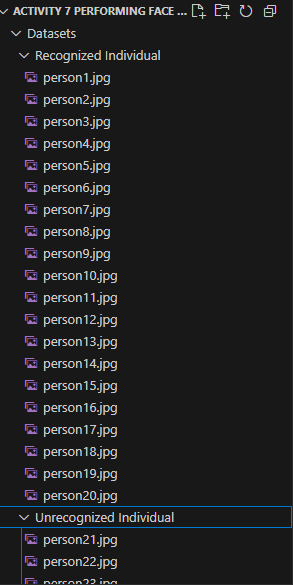

---

### Loading the data and recognizing faces

Next up, we need to load these two resources (the array of images and CSV file) into the face recognition algorithm, so it can be trained to recognize our face. To do this, we build a function that reads the CSV file and—for each line of the file—loads the image at the corresponding path into the images array and the ID into the labels array.

In [2]:
!pip install numpy
!pip install os
!pip install errno
!pip install sys
!pip install cv2

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Audrick\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement os (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Audrick\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for os


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement errno (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Audrick\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for errno


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement sys (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Audrick\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for sys


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Audrick\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for cv2


In [3]:
import numpy as np
import os
import errno
import sys
import cv2

def read_images(path, sz=None):
  c = 0
  X, y = [], []

  for dirname, dirnames, filenames in os.walk(path):
    for subdirname in dirnames:
      subject_path = os.path.join(dirname, subdirname)
      for filename in os.listdir(subject_path):
        try:
          if(filename == ".directory"):
            continue
          filepath = os.path.join(subject_path, filename)
          im = cv2.imread(os.path.join(subject_path, filename), cv2.IMREAD_GRAYSCALE)

          # Resize the images to the prescribed size
          if (sz is not None):
            im = cv2.resize(im, (200,200))

          X.append(np.asarray(im, dtype=np.uint8))
          y.append(c)

        except IOError as e:
          print(f"I/O Error({e.errno}): {e.strerror}")
        except:
          print("Unexpected error:", sys.exc_info()[0])
          raise
      c = c+1
  return [X, y]

In [4]:
img_dataset = read_images("Datasets")
print(img_dataset)

[[array([[ 98,  98,  97, ..., 216, 219, 217],
       [ 98,  98,  98, ..., 221, 220, 218],
       [ 98,  98,  98, ..., 214, 217, 220],
       ...,
       [207, 206, 206, ..., 130, 132, 131],
       [207, 206, 206, ..., 129, 131, 131],
       [207, 206, 205, ..., 129, 131, 130]], dtype=uint8), array([[202, 202, 202, ..., 205, 205, 204],
       [202, 202, 202, ..., 205, 205, 206],
       [202, 202, 202, ..., 205, 205, 206],
       ...,
       [178, 178, 178, ..., 185, 185, 180],
       [178, 178, 178, ..., 184, 184, 179],
       [178, 178, 178, ..., 183, 183, 178]], dtype=uint8), array([[229, 228, 230, ..., 231, 230, 229],
       [229, 228, 230, ..., 231, 230, 229],
       [229, 228, 230, ..., 230, 230, 229],
       ...,
       [218, 218, 218, ..., 214, 214, 213],
       [219, 219, 219, ..., 213, 214, 213],
       [219, 219, 219, ..., 213, 214, 213]], dtype=uint8), array([[233, 233, 233, ..., 237, 237, 238],
       [233, 233, 233, ..., 236, 237, 237],
       [233, 233, 233, ..., 236, 237,

**Question: Run the function above on your generated dataset. Provide an analysis and note all the challenges you have encountered running this code.**

The function above converts the the generated dataset into grayscale images, this enables the face recognition models to detect and categorize real-time faces. No challenges were encountered into running this code.

---

### Performing Face Recognition Algorithms

Here is a sample script for testing the Face Recognition Algorithm. In this section, we're going to follow the same process but with different algorithms for face recognitions, namely:
- Eigenface Recognition
- Fisherface Recognition
- Local Binary Pattern Histograms (LBPH) Recognition

In [5]:
!pip install opencv-contrib-python --user


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Audrick\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
def face_rec():
  names = ['Friend1', 'Friend2'] # Put your names here for faces to recognize
  if len(sys.argv) < 2:
    print("USAGE: facerec_demo.py </path/to/images> [</path/to/store/images/at>]")
    sys.exit()

  [X, y] = read_images("Datasets", sz=(200, 200))
  y = np.asarray(y, dtype=np.int32)

  model = cv2.face.EigenFaceRecognizer_create()
  model.train(X, y)

  camera = cv2.VideoCapture(1)
  face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

  while True:
    ret, img = camera.read()
    if not ret:
      break

    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
      gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
      roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

      try:
        params = model.predict(roi)
        label = names[params[0]]
        cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
      except:
        continue

    cv2.imshow("camera", img)
    if cv2.waitKey(1) & 0xFF == ord("q"):
      break

  camera.release()
  cv2.destroyAllWindows()

if __name__ == "__main__":
  face_rec()

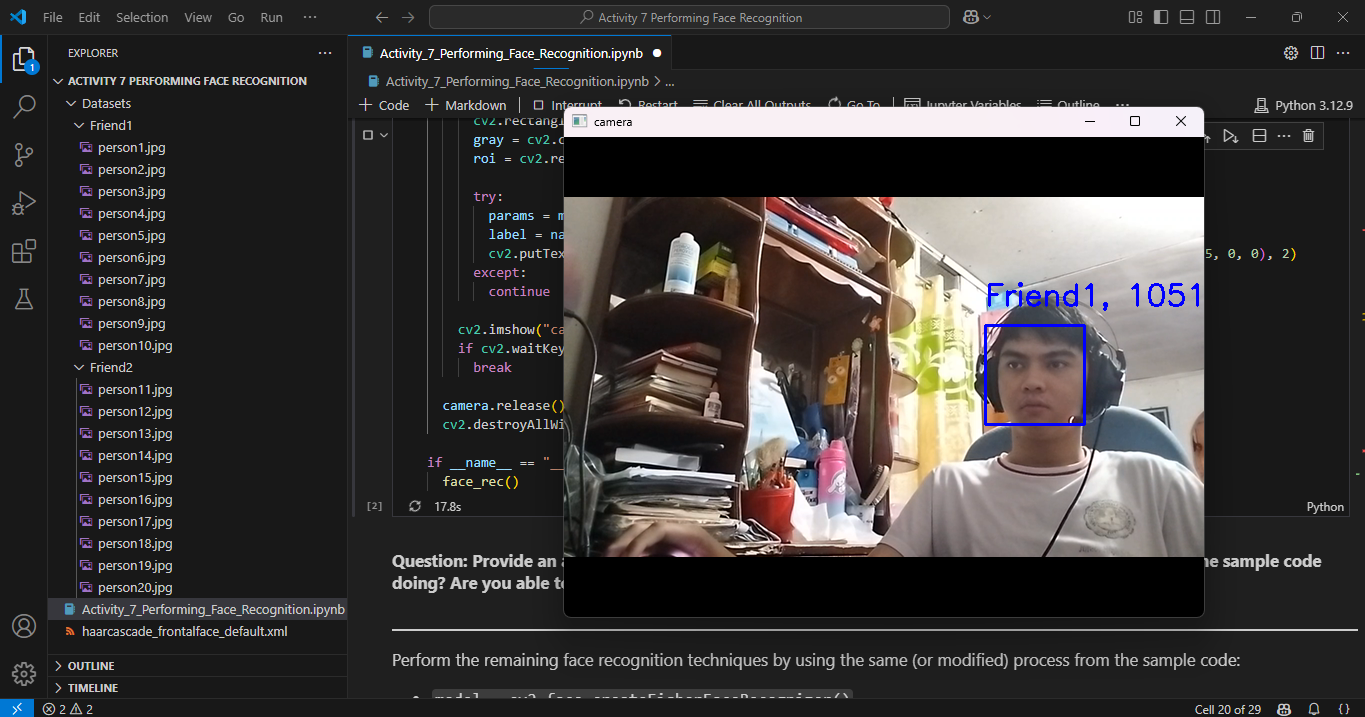

**Question: Provide an analysis of the sample script for the process using the Eigenface Model. What is the sample code doing? Are you able to troubleshoot any problems encountered?**

---
Perform the remaining face recognition techniques by using the same (or modified) process from the sample code:

- `model = cv2.face.FisherFaceRecognizer_create()`
- `model = cv2.face.LBPHFaceRecognizer_create()`

**Question: The `predict()` method returns a two-element array. Provide your analysis of the two returned values and their important in this application.**

The `predict()` method is the central identifier of the model, the two values returned by the method are the `label` and `confidence`. The `label` manages the capability of the model to classify and recognize an individual's face. The `confidence`, on the other hand, provides a measure of accurate the face recognizer model's prediction. This serves as a validity checker for each prediction done.

## 4. Supplementary Activity

Your accomplisment of the tasks below contribute to the achievement of ILO1, ILO2, and ILO3 for this module.

---

Tasks:
1. Create a new dataset for testing, this dataset must include the following:
  - The same person/s that the model has to recognize.
  - Different person/s that the model should not recognize.
2. For each model, perform 20 tests. Document the testing performed and provide observations.
3. Conclude on the performed tests by providing your evaluation of the performance of the models.

In [66]:
def face_rec():
    names = ['Recognized Individual', 'Unrecognized Individual']  # Put your names here for faces to recognize

    [X, y] = read_images("Datasets", sz=(200, 200))
    y = np.asarray(y, dtype=np.int32)

    model = cv2.face.LBPHFaceRecognizer_create()
    model.train(X, y)

    camera = cv2.VideoCapture(1)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    while True:
        ret, img = camera.read()
        if not ret:
            break

        faces = face_cascade.detectMultiScale(img, 1.3, 5)

        for (x, y, w, h) in faces:
            gray = cv2.cvtColor(img[y:y + h, x:x + w], cv2.COLOR_BGR2GRAY)
            roi = cv2.resize(gray, (200, 200), interpolation=cv2.INTER_LINEAR)

            try:
                params = model.predict(roi)
                label = names[params[0]]
                color = (0, 255, 0)

                if label == 'Unrecognized Individual':
                    color = (0, 0, 255)

                cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
                cv2.putText(img, label + ", " + str(params[1]), (x, y - 20), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
            except:
                continue

        cv2.imshow("camera", img)
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break

    camera.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    face_rec()

**Documentation Link**: https://docs.google.com/document/d/13idHWUoeDL_ysE5p84IKmm_GLoErY4KAV0wCL4hVIG8/edit?usp=sharing

**Observation**: Out of the three face recognizer models that were tested, the `FisherFaceRecognizer` model is the most accurate and performed oustandingly overall. The `FisherFaceRecognizer` accurately predicted 19/20 tests, the `EigenFaceRecognizer` accurately predicted 12/20 tests, and the `LBPHFaceRecognizer` accurately predicted 6/20 tests. The `EigenFaceRecognizer` is slightly unstable in classifying between each categories while `LBPHFaceRecognizer` just predicts **Unrecognized Individual** to all detected faces.

## 5. Summary, Conclusions and Lessons Learned

The activity provided the task of implementing the learnings from the previous activities into one. This gave a challenge of implementing my own generated dataset into three given face recognition models. I have learned that each model given have different performance provided the same dataset. Overall, this task gave insights in the inner workings of the different face recognition model and how different each performs and which of them would be the most reliable.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*